In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 1 : In order to gain a comprehensive overview of our lending operations and monitor the performance of loans, we aim to create a grid view report categorized by Loan Status.
#- By providing insights into metrics such as
#     Total Loan Applications
#     Total Funded Amount
#     Total Amount Received
#     Month-to-Date (MTD) Funded Amount
#     MTD Amount Received
#     Average Interest Rate
#     Average Debt-to-Income Ratio (DTI)

In [4]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
# Load the Dataset

In [5]:
df=pd.read_excel("//Applications//financial_loan.xlsx")
df

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-11-02 00:00:00,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01 00:00:00,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-05-01 00:00:00,2021-12-12 00:00:00,2021-09-01 00:00:00,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,2021-12-12 00:00:00,2021-12-03 00:00:00,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01 00:00:00,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-11-07 00:00:00,16-05-2021,16-05-2021,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-11-10 00:00:00,16-04-2021,16-05-2021,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-11-09 00:00:00,16-05-2021,16-05-2021,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-11-10 00:00:00,16-05-2021,16-05-2021,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677


In [6]:
# Understand the data
#    The above Excel sheet tells us that we have information on the people who took the loan, including the details of ID, 
#    address_state(residential purpose), 

#    Application_type(To know whether it is an Individual or joint),

#    Emp_length(To check whether a person will be able to repay the loan or not, so they need at least 6 months to 2 years of 
#    employment length),

#    Emp_title(Which represents the role of a person performing in an organization), 

#    Grade(Grading will be from A-G, A Grade means that the person has a low level of risk, and grade with G means 
#    that person has a high level of risk).

#    Home_ownership(it means whether it is mortgage loan or rent or personal loan)

#    issue_date( means when the loan was issued to the person)

#    Last_credit_pull_date (means the previous date which the lenders have reviewed for credit evaluation).

#    last_payment_date (means the payment which is done recently )

#    Loan_status ( means checking the condition of the loan whether it is active or paid off or in default, differed)

#    Next_payment_date( Means upcoming due date for next payment)

#    Member_id (it's an identification number to track the member's activities)

#    Purpose ( to know the purpose of taking the loan)

#    Sub_grade ( within the grade the subgrade be like for A ( A1, A2, A3.....) to know the level of level of risk)

#    Term ( the term refers to a period of time where a person needs to clear the amount within the period of time like 5 yrs or 7 yrs )

#    Verification_status ( it means the status can indicate whether the verification is pending, completed, or failed )

#    Annual_income ( it shows the annual income of a person )

#    DTI ( DTI stands for debts to income, it shows a person's ability to clear the debt. 
#    It is calculated by monthly debt payments by gross monthly income

#    Installment ( it's a scheduled payment made to repay the loan or debt over a set period )

#    int_rate ( how much of the interest rate for the loan sanctions for a period )

#    Loan_Amount ( it shows the total loan amount needed to pay for every installment)

#    total_acc ( it refers to the number of accounts a person has including current and closed )

#    total_amount ( it refers to the total amount need to be cleared )


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [8]:
df["application_type"]

0        INDIVIDUAL
1        INDIVIDUAL
2        INDIVIDUAL
3        INDIVIDUAL
4        INDIVIDUAL
            ...    
38571    INDIVIDUAL
38572    INDIVIDUAL
38573    INDIVIDUAL
38574    INDIVIDUAL
38575    INDIVIDUAL
Name: application_type, Length: 38576, dtype: object

In [9]:
df["application_type"].unique()

array(['INDIVIDUAL'], dtype=object)

In [10]:
df["application_type"].value_counts()


# The total Applications are 38576 and the type of applications are individual

application_type
INDIVIDUAL    38576
Name: count, dtype: int64

In [11]:
df["address_state"]

0        GA
1        CA
2        CA
3        TX
4        IL
         ..
38571    NJ
38572    NY
38573    CA
38574    NY
38575    NY
Name: address_state, Length: 38576, dtype: object

In [12]:
df["address_state"].unique()

array(['GA', 'CA', 'TX', 'IL', 'PA', 'FL', 'MI', 'RI', 'NY', 'MD', 'WI',
       'NV', 'UT', 'WA', 'NH', 'HI', 'MA', 'OK', 'NJ', 'OH', 'AZ', 'CT',
       'MN', 'CO', 'TN', 'VA', 'MO', 'DE', 'NM', 'LA', 'AR', 'KY', 'NC',
       'SC', 'WV', 'KS', 'WY', 'OR', 'AL', 'VT', 'MS', 'DC', 'MT', 'SD',
       'AK', 'IN', 'ME', 'ID', 'NE', 'IA'], dtype=object)

In [13]:
df["address_state"].value_counts()

address_state
CA    6894
NY    3701
FL    2773
TX    2664
NJ    1822
IL    1486
PA    1482
VA    1375
GA    1355
MA    1310
OH    1188
MD    1027
AZ     833
WA     805
CO     770
NC     759
CT     730
MI     685
MO     660
MN     592
NV     482
SC     464
WI     446
OR     436
AL     432
LA     426
KY     320
OK     293
KS     260
UT     252
AR     236
DC     214
RI     196
NM     183
HI     170
WV     167
NH     161
DE     110
WY      79
MT      79
AK      78
SD      63
VT      54
MS      19
TN      17
IN       9
ID       6
NE       5
IA       5
ME       3
Name: count, dtype: int64

In [14]:
df["emp_length"]

0         < 1 year
1          9 years
2          4 years
3         < 1 year
4        10+ years
           ...    
38571     < 1 year
38572      8 years
38573      5 years
38574      5 years
38575      4 years
Name: emp_length, Length: 38576, dtype: object

In [15]:
df["emp_length"].unique()

array(['< 1 year', '9 years', '4 years', '10+ years', '3 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years'],
      dtype=object)

In [16]:
df["emp_length"].value_counts()

emp_length
10+ years    8870
< 1 year     4575
2 years      4382
3 years      4088
4 years      3428
5 years      3273
1 year       3229
6 years      2228
7 years      1772
8 years      1476
9 years      1255
Name: count, dtype: int64

In [17]:
df["emp_title"]

0                                  Ryder
1                         MKC Accounting
2                  Chemat Technology Inc
3                    barnes distribution
4                          J&J Steel Inc
                      ...               
38571           Joseph M Sanzari Company
38572                          Swat Fame
38573    Anaheim Regional Medical Center
38574                 Brooklyn Radiology
38575                      Allen Edmonds
Name: emp_title, Length: 38576, dtype: object

In [18]:
df["emp_title"].unique()

array(['Ryder', 'MKC Accounting', 'Chemat Technology Inc', ...,
       'Anaheim Regional Medical Center', 'Brooklyn Radiology',
       'Allen Edmonds'], dtype=object)

In [19]:
df["emp_title"].value_counts()

emp_title
US Army                           135
Bank of America                   109
IBM                                67
AT&T                               63
Wells Fargo                        57
                                 ... 
Emeril's Delmonico's                1
The Shafer Law Group                1
U.S navy                            1
Wellspring Healthcare Services      1
Allen Edmonds                       1
Name: count, Length: 28525, dtype: int64

In [20]:
df["grade"]

0        C
1        E
2        C
3        B
4        A
        ..
38571    C
38572    C
38573    D
38574    D
38575    F
Name: grade, Length: 38576, dtype: object

In [21]:
df["grade"].unique()

array(['C', 'E', 'B', 'A', 'D', 'F', 'G'], dtype=object)

In [22]:
df["grade"].value_counts()

grade
B    11674
A     9689
C     7904
D     5182
E     2786
F     1028
G      313
Name: count, dtype: int64

In [23]:
df["home_ownership"]

0            RENT
1            RENT
2            RENT
3        MORTGAGE
4        MORTGAGE
           ...   
38571    MORTGAGE
38572        RENT
38573        RENT
38574        RENT
38575        RENT
Name: home_ownership, Length: 38576, dtype: object

In [24]:
df["home_ownership"].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE'], dtype=object)

In [25]:
df["home_ownership"].value_counts()

home_ownership
RENT        18439
MORTGAGE    17198
OWN          2838
OTHER          98
NONE            3
Name: count, dtype: int64

In [26]:
df["issue_date"]

0        2021-11-02 00:00:00
1        2021-01-01 00:00:00
2        2021-05-01 00:00:00
3                 25-02-2021
4        2021-01-01 00:00:00
                ...         
38571    2021-11-07 00:00:00
38572    2021-11-10 00:00:00
38573    2021-11-09 00:00:00
38574    2021-11-10 00:00:00
38575    2021-11-07 00:00:00
Name: issue_date, Length: 38576, dtype: object

In [27]:
df["issue_date"].unique()

array([datetime.datetime(2021, 11, 2, 0, 0),
       datetime.datetime(2021, 1, 1, 0, 0),
       datetime.datetime(2021, 5, 1, 0, 0), '25-02-2021', '17-07-2021',
       '19-11-2021', datetime.datetime(2021, 11, 6, 0, 0),
       datetime.datetime(2021, 2, 9, 0, 0),
       datetime.datetime(2021, 9, 2, 0, 0), '22-07-2021',
       datetime.datetime(2021, 11, 9, 0, 0),
       datetime.datetime(2021, 11, 8, 0, 0),
       datetime.datetime(2021, 11, 12, 0, 0),
       datetime.datetime(2021, 11, 10, 0, 0),
       datetime.datetime(2021, 2, 12, 0, 0),
       datetime.datetime(2021, 9, 10, 0, 0),
       datetime.datetime(2021, 12, 12, 0, 0),
       datetime.datetime(2021, 2, 2, 0, 0),
       datetime.datetime(2021, 7, 7, 0, 0),
       datetime.datetime(2021, 8, 1, 0, 0),
       datetime.datetime(2021, 9, 8, 0, 0),
       datetime.datetime(2021, 11, 1, 0, 0),
       datetime.datetime(2021, 11, 11, 0, 0),
       datetime.datetime(2021, 9, 6, 0, 0),
       datetime.datetime(2021, 10, 1, 0, 0),
    

In [28]:
df["issue_date"].value_counts()

issue_date
2021-11-12 00:00:00    2188
2021-11-11 00:00:00    2120
2021-11-10 00:00:00    2025
2021-11-09 00:00:00    1980
2021-11-08 00:00:00    1873
                       ... 
2021-02-09 00:00:00       1
22-07-2021                1
2021-12-12 00:00:00       1
2021-02-02 00:00:00       1
2021-07-06 00:00:00       1
Name: count, Length: 65, dtype: int64

In [29]:
df["last_credit_pull_date"]

0                 13-09-2021
1                 14-12-2021
2        2021-12-12 00:00:00
3        2021-12-12 00:00:00
4                 14-12-2021
                ...         
38571             16-05-2021
38572             16-04-2021
38573             16-05-2021
38574             16-05-2021
38575             16-05-2021
Name: last_credit_pull_date, Length: 38576, dtype: object

In [30]:
df["last_credit_pull_date"].unique()

array(['13-09-2021', '14-12-2021', datetime.datetime(2021, 12, 12, 0, 0),
       '16-03-2021', '14-06-2021', '14-07-2021', '15-06-2021',
       '13-03-2021', '13-10-2021', '14-02-2021', '16-04-2021',
       '15-09-2021', '16-05-2021', datetime.datetime(2021, 9, 12, 0, 0),
       '13-02-2021', '13-11-2021', datetime.datetime(2021, 10, 11, 0, 0),
       '14-04-2021', datetime.datetime(2021, 12, 1, 0, 0),
       datetime.datetime(2021, 12, 3, 0, 0),
       datetime.datetime(2021, 11, 6, 0, 0), '13-12-2021',
       datetime.datetime(2021, 12, 6, 0, 0), '14-03-2021',
       datetime.datetime(2021, 11, 4, 0, 0),
       datetime.datetime(2021, 11, 11, 0, 0), '15-02-2021',
       datetime.datetime(2021, 11, 7, 0, 0),
       datetime.datetime(2021, 10, 12, 0, 0),
       datetime.datetime(2021, 11, 1, 0, 0),
       datetime.datetime(2021, 7, 8, 0, 0),
       datetime.datetime(2021, 10, 5, 0, 0),
       datetime.datetime(2021, 12, 9, 0, 0),
       datetime.datetime(2021, 10, 9, 0, 0),
       date

In [31]:
df["last_credit_pull_date"].value_counts()

last_credit_pull_date
16-05-2021             10041
16-04-2021              2477
16-03-2021              1096
13-02-2021               832
16-02-2021               714
                       ...  
2021-07-05 00:00:00        1
2021-08-07 00:00:00        1
20-01-2022                 1
2021-08-06 00:00:00        1
2021-07-07 00:00:00        1
Name: count, Length: 107, dtype: int64

In [32]:
df["last_payment_date"]

0                 13-04-2021
1                 15-01-2021
2        2021-09-01 00:00:00
3        2021-12-03 00:00:00
4                 15-01-2021
                ...         
38571             16-05-2021
38572             16-05-2021
38573             16-05-2021
38574             16-05-2021
38575             16-05-2021
Name: last_payment_date, Length: 38576, dtype: object

In [33]:
df["last_payment_date"].unique()

array(['13-04-2021', '15-01-2021', datetime.datetime(2021, 9, 1, 0, 0),
       datetime.datetime(2021, 12, 3, 0, 0),
       datetime.datetime(2021, 12, 8, 0, 0), '13-12-2021', '14-07-2021',
       datetime.datetime(2021, 12, 10, 0, 0), '16-03-2021', '13-08-2021',
       '13-09-2021', '14-12-2021', '13-10-2021',
       datetime.datetime(2021, 12, 11, 0, 0), '15-02-2021',
       datetime.datetime(2021, 10, 8, 0, 0),
       datetime.datetime(2021, 10, 2, 0, 0),
       datetime.datetime(2021, 11, 6, 0, 0),
       datetime.datetime(2021, 8, 8, 0, 0), '13-06-2021',
       datetime.datetime(2021, 9, 12, 0, 0),
       datetime.datetime(2021, 12, 2, 0, 0),
       datetime.datetime(2021, 12, 7, 0, 0),
       datetime.datetime(2021, 10, 7, 0, 0), '13-01-2021',
       datetime.datetime(2021, 11, 8, 0, 0),
       datetime.datetime(2021, 11, 10, 0, 0),
       datetime.datetime(2021, 11, 1, 0, 0), '13-07-2021',
       datetime.datetime(2021, 9, 10, 0, 0), '13-11-2021',
       datetime.datetime(2021, 

In [34]:
df["last_payment_date"].value_counts()

last_payment_date
16-05-2021             1209
13-03-2021             1001
14-12-2021              909
13-05-2021              884
13-02-2021              845
                       ... 
2021-08-11 00:00:00      10
2021-08-06 00:00:00      10
2021-08-03 00:00:00       5
2021-08-01 00:00:00       4
2021-08-02 00:00:00       1
Name: count, Length: 102, dtype: int64

In [35]:
df["loan_status"]

0        Charged Off
1         Fully Paid
2        Charged Off
3         Fully Paid
4         Fully Paid
            ...     
38571        Current
38572        Current
38573        Current
38574        Current
38575        Current
Name: loan_status, Length: 38576, dtype: object

In [36]:
df["loan_status"].unique()

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

In [37]:
df["loan_status"].value_counts()

loan_status
Fully Paid     32145
Charged Off     5333
Current         1098
Name: count, dtype: int64

In [38]:
df["next_payment_date"]

0                 13-05-2021
1                 15-02-2021
2        2021-09-02 00:00:00
3        2021-12-04 00:00:00
4                 15-02-2021
                ...         
38571             16-06-2021
38572             16-06-2021
38573             16-06-2021
38574             16-06-2021
38575             16-06-2021
Name: next_payment_date, Length: 38576, dtype: object

In [39]:
df["next_payment_date"].unique()

array(['13-05-2021', '15-02-2021', datetime.datetime(2021, 9, 2, 0, 0),
       datetime.datetime(2021, 12, 4, 0, 0),
       datetime.datetime(2021, 12, 9, 0, 0), '13-01-2022', '14-08-2021',
       datetime.datetime(2021, 12, 11, 0, 0), '16-04-2021', '13-09-2021',
       '13-10-2021', '14-01-2022', '13-11-2021',
       datetime.datetime(2021, 12, 12, 0, 0), '15-03-2021',
       datetime.datetime(2021, 10, 9, 0, 0),
       datetime.datetime(2021, 10, 3, 0, 0),
       datetime.datetime(2021, 11, 7, 0, 0),
       datetime.datetime(2021, 8, 9, 0, 0), '13-07-2021',
       datetime.datetime(2022, 9, 1, 0, 0),
       datetime.datetime(2021, 12, 3, 0, 0),
       datetime.datetime(2021, 12, 8, 0, 0),
       datetime.datetime(2021, 10, 8, 0, 0), '13-02-2021',
       datetime.datetime(2021, 11, 9, 0, 0),
       datetime.datetime(2021, 11, 11, 0, 0),
       datetime.datetime(2021, 11, 2, 0, 0), '13-08-2021',
       datetime.datetime(2021, 9, 11, 0, 0), '13-12-2021',
       datetime.datetime(2021, 1

In [40]:
df["next_payment_date"].value_counts()

next_payment_date
16-06-2021             1209
13-04-2021             1001
14-01-2022              909
13-06-2021              884
13-03-2021              845
                       ... 
2021-08-12 00:00:00      10
2021-08-07 00:00:00      10
2021-08-04 00:00:00       5
2021-08-02 00:00:00       4
2021-08-03 00:00:00       1
Name: count, Length: 102, dtype: int64

In [41]:
df["member_id"]

0        1314167
1        1288686
2        1304116
3        1272024
4        1302971
          ...   
38571     992381
38572    1192039
38573    1089898
38574    1194971
38575     872217
Name: member_id, Length: 38576, dtype: int64

In [42]:
df["member_id"].unique()

array([1314167, 1288686, 1304116, ..., 1089898, 1194971,  872217])

In [43]:
df["member_id"].value_counts()

member_id
1314167    1
317830     1
605588     1
607168     1
539366     1
          ..
354316     1
222675     1
592798     1
1070101    1
872217     1
Name: count, Length: 38576, dtype: int64

In [44]:
df["purpose"]

0            car
1            car
2            car
3            car
4            car
          ...   
38571    wedding
38572    wedding
38573    wedding
38574    wedding
38575    wedding
Name: purpose, Length: 38576, dtype: object

In [45]:
df["purpose"].unique()

array(['car', 'credit card', 'Debt consolidation', 'educational',
       'home improvement', 'house', 'major purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small business', 'vacation',
       'wedding'], dtype=object)

In [46]:
df["purpose"].value_counts()

purpose
Debt consolidation    18214
credit card            4998
other                  3824
home improvement       2876
major purchase         2110
small business         1776
car                    1497
wedding                 928
medical                 667
moving                  559
house                   366
vacation                352
educational             315
renewable_energy         94
Name: count, dtype: int64

In [47]:
df["sub_grade"]

0        C4
1        E1
2        C5
3        B2
4        A1
         ..
38571    C1
38572    C1
38573    D5
38574    D5
38575    F3
Name: sub_grade, Length: 38576, dtype: object

In [48]:
df["sub_grade"].unique()

array(['C4', 'E1', 'C5', 'B2', 'A1', 'C3', 'C2', 'A4', 'A5', 'B5', 'B4',
       'B3', 'B1', 'D1', 'A2', 'A3', 'D4', 'D2', 'C1', 'D3', 'E3', 'F1',
       'E2', 'E5', 'D5', 'E4', 'F2', 'G3', 'F3', 'G1', 'F4', 'G4', 'G2',
       'F5', 'G5'], dtype=object)

In [49]:
df["sub_grade"].value_counts()

sub_grade
B3    2834
A4    2803
A5    2654
B5    2644
B4    2455
C1    2089
B2    1990
C2    1972
B1    1751
A3    1740
C3    1490
A2    1440
D2    1314
C4    1202
C5    1151
D3    1144
A1    1052
D4     960
D1     913
D5     851
E1     750
E2     640
E3     538
E4     448
E5     410
F1     325
F2     243
F3     182
F4     163
F5     115
G1     101
G2      78
G4      56
G3      48
G5      30
Name: count, dtype: int64

In [50]:
df["term"]

0         60 months
1         36 months
2         36 months
3         60 months
4         36 months
            ...    
38571     60 months
38572     60 months
38573     60 months
38574     60 months
38575     60 months
Name: term, Length: 38576, dtype: object

In [51]:
df["term"].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [52]:
df["term"].value_counts()

term
36 months    28237
60 months    10339
Name: count, dtype: int64

In [53]:
df["verification_status"]

0        Source Verified
1        Source Verified
2           Not Verified
3        Source Verified
4               Verified
              ...       
38571           Verified
38572           Verified
38573           Verified
38574           Verified
38575           Verified
Name: verification_status, Length: 38576, dtype: object

In [54]:
df["verification_status"].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [55]:
df["verification_status"].value_counts()

verification_status
Not Verified       16464
Verified           12335
Source Verified     9777
Name: count, dtype: int64

In [56]:
df["annual_income"]

0         30000.0
1         48000.0
2         50000.0
3         42000.0
4         83000.0
           ...   
38571    100000.0
38572     50000.0
38573     65000.0
38574    368000.0
38575     80000.0
Name: annual_income, Length: 38576, dtype: float64

In [57]:
df["annual_income"].unique()

array([ 30000. ,  48000. ,  50000. , ...,  44250. ,  57040.5, 368000. ])

In [58]:
df["annual_income"].value_counts()

annual_income
60000.00     1471
50000.00     1033
40000.00      859
45000.00      810
75000.00      802
             ... 
47838.00        1
38000.04        1
35570.00        1
171600.00       1
368000.00       1
Name: count, Length: 5096, dtype: int64

In [59]:
df["dti"]

0        0.0100
1        0.0535
2        0.2088
3        0.0540
4        0.0231
          ...  
38571    0.1986
38572    0.0458
38573    0.1734
38574    0.0009
38575    0.0600
Name: dti, Length: 38576, dtype: float64

In [60]:
df["dti"].unique()

array([0.01  , 0.0535, 0.2088, ..., 0.2721, 0.2543, 0.272 ])

In [61]:
df["dti"].value_counts()

dti
0.0000    173
0.1200     48
0.1800     44
0.1920     40
0.1680     38
         ... 
0.2694      1
0.2960      1
0.2961      1
0.2670      1
0.2720      1
Name: count, Length: 2863, dtype: int64

In [62]:
df["installment"]

0         59.83
1        109.43
2        421.65
3         97.06
4        106.53
          ...  
38571    551.64
38572    579.72
38573    627.93
38574    612.72
38575    486.86
Name: installment, Length: 38576, dtype: float64

In [63]:
df["installment"].unique()

array([ 59.83, 109.43, 421.65, ..., 164.99, 113.5 , 627.93])

In [64]:
df["installment"].value_counts()

installment
311.11    68
311.02    54
180.96    53
150.80    46
368.45    45
          ..
459.53     1
215.15     1
167.29     1
218.66     1
627.93     1
Name: count, Length: 15132, dtype: int64

In [65]:
df["int_rate"]

0        0.1527
1        0.1864
2        0.1596
3        0.1065
4        0.0603
          ...  
38571    0.1299
38572    0.1349
38573    0.1749
38574    0.1825
38575    0.2099
Name: int_rate, Length: 38576, dtype: float64

In [66]:
df["int_rate"].unique()

array([0.1527, 0.1864, 0.1596, 0.1065, 0.0603, 0.1465, 0.1427, 0.079 ,
       0.089 , 0.1269, 0.1242, 0.1171, 0.0991, 0.1629, 0.0743, 0.1114,
       0.1109, 0.0766, 0.0751, 0.0963, 0.0894, 0.1148, 0.1149, 0.157 ,
       0.0788, 0.0705, 0.1189, 0.1074, 0.1284, 0.0749, 0.0849, 0.1136,
       0.1199, 0.1095, 0.1099, 0.1221, 0.1241, 0.1134, 0.1399, 0.1367,
       0.1677, 0.1   , 0.0807, 0.0863, 0.0976, 0.1393, 0.0712, 0.1046,
       0.092 , 0.1166, 0.1091, 0.1103, 0.074 , 0.0768, 0.0662, 0.0599,
       0.0699, 0.0729, 0.0542, 0.0676, 0.0774, 0.0692, 0.0932, 0.0617,
       0.0639, 0.0579, 0.08  , 0.0859, 0.0714, 0.0691, 0.0737, 0.0832,
       0.0925, 0.1075, 0.0999, 0.1036, 0.1025, 0.1111, 0.1126, 0.1218,
       0.1059, 0.0962, 0.1037, 0.1158, 0.0988, 0.1062, 0.1253, 0.1051,
       0.1287, 0.1273, 0.138 , 0.1472, 0.1347, 0.1523, 0.1426, 0.1268,
       0.1311, 0.1417, 0.1349, 0.1304, 0.1599, 0.1595, 0.1533, 0.0654,
       0.1183, 0.1357, 0.1306, 0.1422, 0.1316, 0.1496, 0.1565, 0.1474,
      

In [67]:
df["int_rate"].value_counts()

int_rate
0.1099    932
0.1349    811
0.1149    796
0.0751    755
0.0788    701
         ... 
0.2264      1
0.1671      1
0.1620      1
0.1601      1
0.1754      1
Name: count, Length: 371, dtype: int64

In [68]:
df["loan_amount"]

0         2500
1         3000
2        12000
3         4500
4         3500
         ...  
38571    24250
38572    25200
38573    25000
38574    24000
38575    18000
Name: loan_amount, Length: 38576, dtype: int64

In [69]:
df["loan_amount"].unique()

array([ 2500,  3000, 12000,  4500,  3500,  8000,  6000,  5500, 24000,
        4125,  5400, 11200,  5000,  3050, 10000,  2225,  4000,  7000,
        9000,  4800,  6300,  4750,  1850,  4200,  7200,  2400,  7500,
        5550, 22000,  3200, 11000,  4400,  8500,  2000,  7400,  5650,
        1800,  6500, 15000,  8700,  5600,  4600,  3800, 16000,  1300,
        7800,  5900,  3600,  2100,  4975,  1925,  1500,  7750,  9600,
        3900, 12975,  5950,  5100,  5200,  1200,  4650,  1450,  3250,
        3300,  1700,  5525, 18000,  1750,  5375,  9500,  7600,  6400,
        9900,  1000, 10400, 23500, 22600, 23600, 13100,  5800, 10800,
        1900,  8400,  3075,  6200, 11500,  4350,  4150,  4900,  6125,
        2425,  1600,  7100,  8900, 14000, 12250,  3700, 17000,  2550,
        6250, 14400,  8200,  9250,  3375,  1675,  8600,  2800,  3525,
        8800,  2250,  4375,  1275,  5050, 25000,  9800,  6600,  8250,
        2825,  5975,  3350, 20000, 19000,  2200, 14750,  9575, 13250,
        2350, 10625,

In [70]:
df["loan_amount"].value_counts()

loan_amount
10000    2761
12000    2295
5000     1977
15000    1860
6000     1852
         ... 
15675       1
24175       1
5725        1
1625        1
24975       1
Name: count, Length: 880, dtype: int64

In [71]:
df["total_acc"]

0         4
1         4
2        11
3         9
4        28
         ..
38571    33
38572    18
38573    20
38574     9
38575     7
Name: total_acc, Length: 38576, dtype: int64

In [72]:
df["total_acc"].unique()

array([ 4, 11,  9, 28, 30, 23, 31, 21, 33, 13,  3, 15, 18, 14,  8,  7, 20,
       39, 24, 10, 19, 27,  6, 16, 45, 25,  5, 43, 29, 22, 41, 35, 44, 36,
       17, 26, 37, 32, 47, 52, 42, 46, 12, 50, 34, 59, 38, 63, 49, 48, 61,
       51, 55, 40, 53, 62, 58, 67, 54, 57, 56, 70,  2, 64, 60, 80, 79, 71,
       66, 65, 69, 90, 68, 74, 75, 87, 78, 72, 77, 81, 76, 73])

In [73]:
df["total_acc"].value_counts()

total_acc
16    1435
15    1420
17    1408
14    1405
20    1398
      ... 
68       1
90       1
69       1
71       1
73       1
Name: count, Length: 82, dtype: int64

In [74]:
df["total_payment"]

0         1009
1         3939
2         3522
3         4911
4         3835
         ...  
38571    31946
38572    31870
38573    35721
38574    33677
38575    27679
Name: total_payment, Length: 38576, dtype: int64

In [75]:
df["total_payment"].unique()

array([ 1009,  3939,  3522, ..., 31870, 35721, 33677])

In [76]:
df["total_payment"].value_counts()

total_payment
6515     32
11200    31
11197    26
6720     25
5600     23
         ..
11952     1
17003     1
29414     1
3364      1
33677     1
Name: count, Length: 19525, dtype: int64

In [77]:
continous=["annual_income","dti","installment","int_rate"]
discrete_categorical=["address_state","application_type","emp_length","emp_title","grade","home_ownership","issue_date","last_credit_pull_date","last_payment_date","purpose","sub_grade","term","verification_status"]
discrete_count=["id","member_id","loan_amount","total_acc","total_payment"]                     

In [78]:
#descriptive statistics
df[continous].describe()

,annual_income,dti,installment,int_rate
count,3.857600e+04,38576.000000,38576.000000,38576.000000
mean,6.964454e+04,0.133274,326.862965,0.120488
std,6.429368e+04,0.066662,209.092000,0.037164
min,4.000000e+03,0.000000,15.690000,0.054200
25%,4.150000e+04,0.082100,168.450000,0.093200
50%,6.000000e+04,0.134200,283.045000,0.118600
75%,8.320050e+04,0.185900,434.442500,0.145900
max,6.000000e+06,0.299900,1305.190000,0.245900


In [79]:
df[continous].skew()

annual_income    31.074172
dti              -0.029921
installment       1.120447
int_rate          0.292264
dtype: float64

In [80]:
df[discrete_categorical].describe()

,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,purpose,sub_grade,term,verification_status
count,38576,38576,38576,37138,38576,38576,38576,38576,38576,38576,38576,38576,38576
unique,50,1,11,28525,7,5,65,107,102,14,35,2,3
top,CA,INDIVIDUAL,10+ years,US Army,B,RENT,2021-11-12 00:00:00,16-05-2021,16-05-2021,Debt consolidation,B3,36 months,Not Verified
freq,6894,38576,8870,135,11674,18439,2188,10041,1209,18214,2834,28237,16464


In [81]:
df.isnull().sum()

id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

In [82]:
df.isnull().sum()/len(df)*100

id                       0.000000
address_state            0.000000
application_type         0.000000
emp_length               0.000000
emp_title                3.727706
grade                    0.000000
home_ownership           0.000000
issue_date               0.000000
last_credit_pull_date    0.000000
last_payment_date        0.000000
loan_status              0.000000
next_payment_date        0.000000
member_id                0.000000
purpose                  0.000000
sub_grade                0.000000
term                     0.000000
verification_status      0.000000
annual_income            0.000000
dti                      0.000000
installment              0.000000
int_rate                 0.000000
loan_amount              0.000000
total_acc                0.000000
total_payment            0.000000
dtype: float64

In [83]:
df["emp_title"].fillna(0)

0                                  Ryder
1                         MKC Accounting
2                  Chemat Technology Inc
3                    barnes distribution
4                          J&J Steel Inc
                      ...               
38571           Joseph M Sanzari Company
38572                          Swat Fame
38573    Anaheim Regional Medical Center
38574                 Brooklyn Radiology
38575                      Allen Edmonds
Name: emp_title, Length: 38576, dtype: object

In [84]:
df2=df.dropna()
df2

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-11-02 00:00:00,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01 00:00:00,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-05-01 00:00:00,2021-12-12 00:00:00,2021-09-01 00:00:00,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,2021-12-12 00:00:00,2021-12-03 00:00:00,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01 00:00:00,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-11-07 00:00:00,16-05-2021,16-05-2021,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-11-10 00:00:00,16-04-2021,16-05-2021,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-11-09 00:00:00,16-05-2021,16-05-2021,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-11-10 00:00:00,16-05-2021,16-05-2021,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677


In [85]:
df2.isnull().sum()

id                       0
address_state            0
application_type         0
emp_length               0
emp_title                0
grade                    0
home_ownership           0
issue_date               0
last_credit_pull_date    0
last_payment_date        0
loan_status              0
next_payment_date        0
member_id                0
purpose                  0
sub_grade                0
term                     0
verification_status      0
annual_income            0
dti                      0
installment              0
int_rate                 0
loan_amount              0
total_acc                0
total_payment            0
dtype: int64

In [86]:
df2.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
38571    False
38572    False
38573    False
38574    False
38575    False
Length: 37138, dtype: bool

In [87]:
df2.duplicated().sum()

0

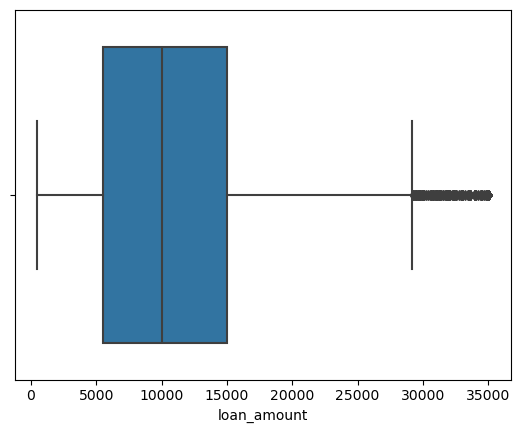

In [88]:
sns.boxplot(x=df["loan_amount"])
plt.show()

In [89]:
# calculating Q1
Q1= df["loan_amount"].quantile(0.25)
print("Q1",Q1)
# calculating Q3
Q3= df["loan_amount"].quantile(0.75)
print("Q3",Q3)
# calculating IQR
IQR = Q3-Q1
print("IQR",IQR)
# lower_limit
lower_limit=Q1-(IQR*1.5)
print("lower_limit",lower_limit)
#upper_limit
upper_limit=Q3+(IQR*1.5)
print("upper_limit",upper_limit)

Q1 5500.0
Q3 15000.0
IQR 9500.0
lower_limit -8750.0
upper_limit 29250.0


In [90]:
df[(df["loan_amount"]<lower_limit)|(df["loan_amount"]>upper_limit)]

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
1425,873223,CT,INDIVIDUAL,10+ years,Pratt Whitney,F,MORTGAGE,2021-11-09 00:00:00,16-04-2021,14-10-2021,...,F2,60 months,Verified,85000.0,0.0496,805.21,0.2062,30000,28,44764
1494,1044500,NY,INDIVIDUAL,10+ years,Nypd,F,OWN,2021-11-12 00:00:00,16-05-2021,16-05-2021,...,F1,60 months,Verified,100000.0,0.1884,863.73,0.2089,32000,24,45754
1640,1060630,TX,INDIVIDUAL,10+ years,shell Oil,E,MORTGAGE,2021-11-12 00:00:00,14-07-2021,14-06-2021,...,E2,60 months,Verified,80000.0,0.2682,500.33,0.1903,30000,29,26880
1643,1056174,CO,INDIVIDUAL,10+ years,Visa Inc,A,MORTGAGE,2021-11-12 00:00:00,16-04-2021,14-12-2021,...,A5,36 months,Verified,106000.0,0.1209,1111.37,0.0890,35000,28,40009
1679,1055282,MI,INDIVIDUAL,1 year,IBM,C,MORTGAGE,2021-11-12 00:00:00,13-11-2021,13-11-2021,...,C2,36 months,Verified,123000.0,0.1934,1200.82,0.1427,35000,34,42004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38491,682280,PA,INDIVIDUAL,2 years,Williams Residential,E,RENT,2021-11-03 00:00:00,2021-12-04 00:00:00,2021-11-12 00:00:00,...,E1,60 months,Verified,70000.0,0.0864,858.59,0.1640,35000,39,8667
38500,822087,MD,INDIVIDUAL,4 years,DHS/TSA,C,MORTGAGE,2021-11-07 00:00:00,16-04-2021,14-11-2021,...,C2,60 months,Verified,137400.0,0.1545,805.17,0.1349,35000,36,46388
38511,702589,NJ,INDIVIDUAL,2 years,Team Health,E,MORTGAGE,2021-11-03 00:00:00,2021-12-05 00:00:00,2021-12-05 00:00:00,...,E3,60 months,Verified,146000.0,0.1925,872.48,0.1714,35000,46,41061
38545,715394,NY,INDIVIDUAL,5 years,Nestle Waters North America,E,RENT,2021-11-04 00:00:00,16-05-2021,13-04-2021,...,E5,60 months,Verified,67588.0,0.2436,759.85,0.1788,30000,21,33201


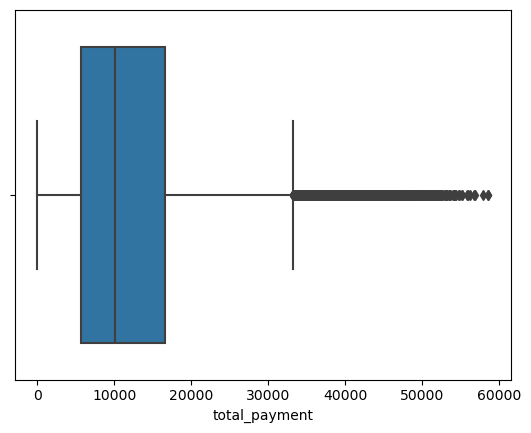

In [91]:
sns.boxplot(x=df["total_payment"])
plt.show()

In [92]:
# calculating Q1
Q1= df["total_payment"].quantile(0.25)
print("Q1",Q1)
# calculating Q3
Q3= df["total_payment"].quantile(0.75)
print("Q3",Q3)
# calculating IQR
IQR = Q3-Q1
print("IQR",IQR)
# lower_limit
lower_limit=Q1-(IQR*1.5)
print("lower_limit",lower_limit)
#upper_limit
upper_limit=Q3+(IQR*1.5)
print("upper_limit",upper_limit)

Q1 5633.0
Q3 16658.0
IQR 11025.0
lower_limit -10904.5
upper_limit 33195.5


In [93]:
df[(df["total_payment"]<lower_limit)|(df["total_payment"]>upper_limit)]

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
1235,738971,CA,INDIVIDUAL,7 years,tenet health,B,MORTGAGE,2021-11-04 00:00:00,15-01-2021,14-12-2021,...,B3,60 months,Source Verified,102000.0,0.1381,608.65,0.1099,28000,17,36045
1425,873223,CT,INDIVIDUAL,10+ years,Pratt Whitney,F,MORTGAGE,2021-11-09 00:00:00,16-04-2021,14-10-2021,...,F2,60 months,Verified,85000.0,0.0496,805.21,0.2062,30000,28,44764
1494,1044500,NY,INDIVIDUAL,10+ years,Nypd,F,OWN,2021-11-12 00:00:00,16-05-2021,16-05-2021,...,F1,60 months,Verified,100000.0,0.1884,863.73,0.2089,32000,24,45754
1568,1065480,WI,INDIVIDUAL,5 years,Prairie du Chien Memorial Hospital,B,RENT,2021-11-12 00:00:00,14-12-2021,15-01-2021,...,B5,36 months,Source Verified,100000.0,0.1235,939.26,0.1269,28000,15,33813
1586,1064639,VA,INDIVIDUAL,3 years,MCDean,E,MORTGAGE,2021-11-12 00:00:00,16-03-2021,16-03-2021,...,E2,60 months,Verified,85000.0,0.1715,648.93,0.1903,25000,19,38487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38514,608734,OR,INDIVIDUAL,7 years,Comfortcare Dental,F,MORTGAGE,2021-10-11 00:00:00,15-05-2021,13-11-2021,...,F4,60 months,Verified,105000.0,0.2114,621.39,0.1891,24000,35,34397
38545,715394,NY,INDIVIDUAL,5 years,Nestle Waters North America,E,RENT,2021-11-04 00:00:00,16-05-2021,13-04-2021,...,E5,60 months,Verified,67588.0,0.2436,759.85,0.1788,30000,21,33201
38550,853145,NY,INDIVIDUAL,8 years,giuntas meat farms,E,RENT,2021-11-08 00:00:00,14-04-2021,14-04-2021,...,E2,60 months,Verified,104000.0,0.1058,896.22,0.1839,35000,15,48639
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-11-09 00:00:00,16-05-2021,16-05-2021,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721


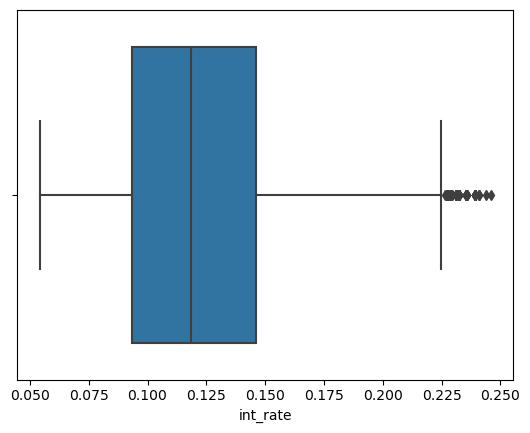

In [94]:
sns.boxplot(x=df["int_rate"])
plt.show()

In [95]:
Q1= df["int_rate"].quantile(0.25)
print("Q1",Q1)
Q3=df["int_rate"].quantile(0.75)
print("Q3",Q3)
IQR = Q3-Q1
print("IQR",IQR)
lower_limit=Q1-(IQR*1.5)
print("lower_limit",lower_limit)
upper_limit=Q3+(IQR*1.5)
print("upper_limit",upper_limit)

Q1 0.0932
Q3 0.1459
IQR 0.0527
lower_limit 0.01415000000000001
upper_limit 0.22494999999999998


In [96]:
df[(df["int_rate"]<lower_limit)|(df["int_rate"]>upper_limit)]

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
1209,829918,VA,INDIVIDUAL,< 1 year,KForce,G,RENT,2021-11-08 00:00:00,14-10-2021,14-06-2021,...,G3,60 months,Source Verified,105000.00,0.0751,134.91,0.2285,4800,12,4867
1646,1061914,NY,INDIVIDUAL,6 years,JPMORGAN CHASE,G,RENT,2021-11-12 00:00:00,16-04-2021,15-06-2021,...,G1,60 months,Not Verified,85000.00,0.0702,628.13,0.2274,22400,16,26377
1672,1060753,FL,INDIVIDUAL,4 years,exclusive autoline inc,G,RENT,2021-11-12 00:00:00,15-04-2021,15-04-2021,...,G4,60 months,Verified,60000.00,0.1774,715.75,0.2391,24925,26,37823
5763,1036060,OH,INDIVIDUAL,< 1 year,koppers,G,MORTGAGE,2021-11-12 00:00:00,16-05-2021,13-10-2021,...,G2,60 months,Source Verified,65000.00,0.1506,743.38,0.2313,26300,26,16354
6238,1045885,TX,INDIVIDUAL,4 years,Ashbrook Simon-Hartley,G,MORTGAGE,2021-11-12 00:00:00,15-09-2021,13-02-2021,...,G5,60 months,Verified,145000.00,0.0830,720.80,0.2411,25000,31,31602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35496,774690,NY,INDIVIDUAL,7 years,Mary Manning walsh Home,G,RENT,2021-11-06 00:00:00,2021-12-11 00:00:00,2021-12-07 00:00:00,...,G4,60 months,Not Verified,35775.63,0.1298,348.01,0.2440,12000,5,4778
36899,1027164,WA,INDIVIDUAL,7 years,NaN,G,MORTGAGE,2021-11-11 00:00:00,16-02-2021,16-02-2021,...,G3,60 months,Source Verified,95000.00,0.0566,162.40,0.2352,5700,7,9593
37024,971928,VA,INDIVIDUAL,10+ years,VCUHS,G,MORTGAGE,2021-11-10 00:00:00,13-04-2021,2021-12-12 00:00:00,...,G1,60 months,Verified,95000.00,0.1853,841.24,0.2274,30000,43,20424
37261,781558,OR,INDIVIDUAL,3 years,NaN,F,RENT,2021-11-06 00:00:00,16-05-2021,16-05-2021,...,F5,60 months,Source Verified,66000.00,0.0280,180.20,0.2294,6400,9,10612


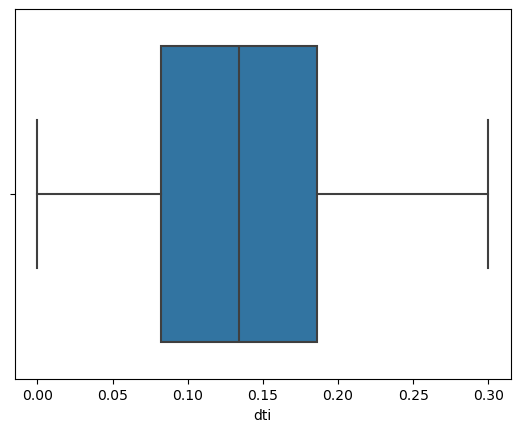

In [97]:
sns.boxplot(x=df["dti"])
plt.show()

In [98]:
Q1=df["dti"].quantile(0.25)
print("Q1",Q1)
Q3=df["dti"].quantile(0.75)
print("Q3",Q3)
IQR=Q3-Q1
print("IQR",IQR)
lower_limit=Q1-(IQR*1.5)
print("lower_limit",lower_limit)
upper_limit=Q3+(IQR*1.5)
print("upper_limit",upper_limit)

Q1 0.0821
Q3 0.1859
IQR 0.1038
lower_limit -0.0736
upper_limit 0.3416


In [99]:
df[(df["dti"]<lower_limit)|(df["dti"]>upper_limit)]

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment


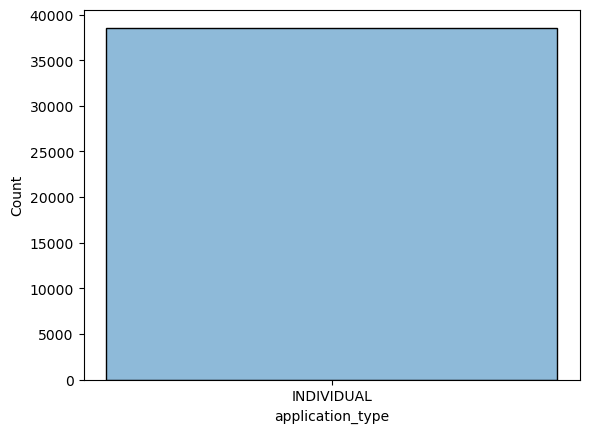

In [100]:
sns.histplot(df["application_type"],bins=0.05,kde=True)
plt.show()

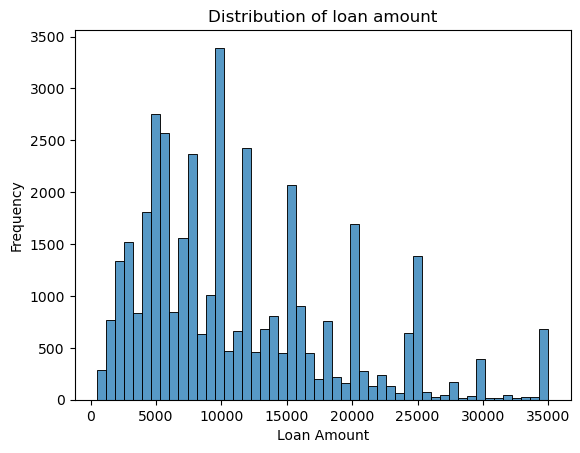

In [101]:
sns.histplot(df['loan_amount'],bins=50)
plt.title('Distribution of loan amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()



## Here we can able to see that the more amount of loan amount is between 5000 to 10000. 
## When it comes from 10000, we can able to see the gradual fall in the amount of loan preffered.

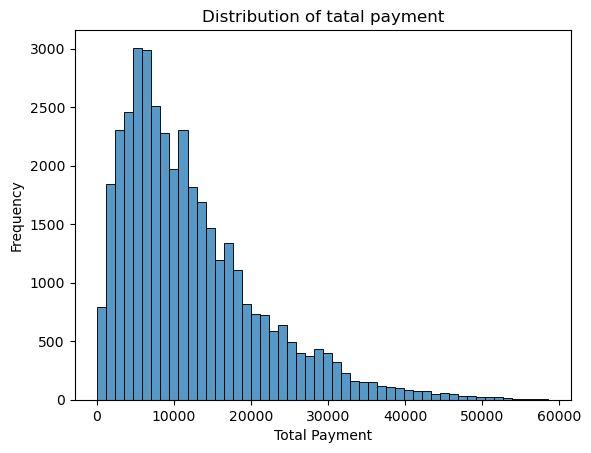

In [102]:
sns.histplot(df['total_payment'],bins=50)
plt.title('Distribution of tatal payment')
plt.xlabel('Total Payment')
plt.ylabel('Frequency')
plt.show()



# The maximum amount of total payments are below 20000.
# We can able to see the gradual deccrease in the total payment till 60000.

In [103]:
df['issue_date']=pd.to_datetime(df['issue_date'])
df['last_payment_date']=pd.to_datetime(df['last_payment_date'])
df['last_credit_pull_date']=pd.to_datetime(df['last_credit_pull_date'])

In [108]:
from datetime import datetime
# total loan applications
total_loan_applications = len(df)
total_loan_applications

# month-to-date (MTD) Loan Applications
current_month = datetime.now().month
mtd_loan_applications = len(df[df['issue_date'].dt.month == current_month])
mtd_loan_applications

# month-over-month(MoM) loan applications
df['month'] = df['issue_date'].dt.to_period('M')
loan_applications_by_month = df.groupby('month').size()
loan_applications_by_month_pct_change = loan_applications_by_month.pct_change()
loan_applications_by_month

month
2021-01        2
2021-02        4
2021-05        1
2021-07      253
2021-08     1561
2021-09     4706
2021-10    11197
2021-11    20851
2021-12        1
Freq: M, dtype: int64

In [127]:
loan_applications_by_month_pct_change

month
2021-01           NaN
2021-02      1.000000
2021-05     -0.750000
2021-07    252.000000
2021-08      5.169960
2021-09      2.014734
2021-10      1.379303
2021-11      0.862195
2021-12     -0.999952
Freq: M, dtype: float64

In [106]:
# Total Funded Amount
total_funded_amount = df['loan_amount'].sum()
total_funded_amount

435757075

In [107]:
# MTD funded amount
mtd_funded_amount = df[df['issue_date'].dt.month == current_month]['loan_amount'].sum()
mtd_funded_amount

2232675

In [110]:
# MoM Funded Amount
funded_amount_by_month = df.groupby('month')['loan_amount'].sum()
funded_amount_by_month_pct_change = funded_amount_by_month.pct_change()
funded_amount_by_month

month
2021-01         6500
2021-02        36550
2021-05        12000
2021-07      2232675
2021-08     14385275
2021-09     46295750
2021-10    119568600
2021-11    253214725
2021-12         5000
Freq: M, Name: loan_amount, dtype: int64

In [126]:
funded_amount_by_month_pct_change

month
2021-01           NaN
2021-02      4.623077
2021-05     -0.671683
2021-07    185.056250
2021-08      5.443067
2021-09      2.218274
2021-10      1.582712
2021-11      1.117736
2021-12     -0.999980
Freq: M, Name: loan_amount, dtype: float64

In [112]:
# Total_amount_recieved
total_amount_recieved = df['total_payment'].sum()
total_amount_recieved

473070933

In [113]:
# MTD amount recieved
mtd_amount_recieved = df[df['last_payment_date'].dt.month == current_month]['total_payment'].sum()
mtd_amount_recieved

23157634

In [114]:
# MoM Amount Recieved
amount_recieved_by_month = df.groupby('month')['total_payment'].sum()
amount_recieved_by_month_pct_change = amount_recieved_by_month.pct_change()
amount_recieved_by_month

month
2021-01         7774
2021-02        23460
2021-05         3522
2021-07      2227604
2021-08     14065428
2021-09     50344561
2021-10    128148384
2021-11    278244337
2021-12         5863
Freq: M, Name: total_payment, dtype: int64

In [125]:
amount_recieved_by_month_pct_change

month
2021-01           NaN
2021-02      2.017751
2021-05     -0.849872
2021-07    631.482680
2021-08      5.314151
2021-09      2.579312
2021-10      1.545427
2021-11      1.171267
2021-12     -0.999979
Freq: M, Name: total_payment, dtype: float64

In [116]:
# average interest rate
average_interest_rate = df['int_rate'].mean()
average_interest_rate

0.12048831397760265

In [117]:
# MTD Average Interest Rate
mtd_average_interest_rate = df[df['issue_date'].dt.month == current_month]['int_rate'].mean()
mtd_average_interest_rate

0.10341778656126481

In [123]:
# MoM Average Interest Rate
average_interest_rate_by_month = df.groupby('month')['int_rate'].mean()
average_interest_rate_by_month_pct_change = average_interest_rate_by_month.pct_change()
average_interest_rate_by_month

month
2021-01    0.123350
2021-02    0.114375
2021-05    0.159600
2021-07    0.103418
2021-08    0.111515
2021-09    0.121863
2021-10    0.117712
2021-11    0.122547
2021-12    0.106500
Freq: M, Name: int_rate, dtype: float64

In [124]:
average_interest_rate_by_month_pct_change

month
2021-01         NaN
2021-02   -0.072760
2021-05    0.395410
2021-07   -0.352019
2021-08    0.078294
2021-09    0.092798
2021-10   -0.034060
2021-11    0.041073
2021-12   -0.130948
Freq: M, Name: int_rate, dtype: float64

In [129]:
# Average Debt-to-Income Ratio(DTI):
average_dti = df['dti'].mean()
average_dti

0.13327433119037743

In [130]:
# MTD Average DTI
mtd_average_dti = df[df['issue_date'].dt.month == current_month]['dti'].mean()
mtd_average_dti

0.10314150197628458

In [131]:
# MoM Average DTI
average_dti_by_month = df.groupby('month')['dti'].mean()
average_dti_by_month

month
2021-01    0.038300
2021-02    0.056025
2021-05    0.208800
2021-07    0.103142
2021-08    0.120138
2021-09    0.123820
2021-10    0.129825
2021-11    0.138629
2021-12    0.139200
Freq: M, Name: dti, dtype: float64

In [132]:
average_dti_by_month_pct_change = average_dti_by_month.pct_change()
average_dti_by_month_pct_change

month
2021-01         NaN
2021-02    0.462794
2021-05    2.726908
2021-07   -0.506027
2021-08    0.164787
2021-09    0.030648
2021-10    0.048501
2021-11    0.067817
2021-12    0.004115
Freq: M, Name: dti, dtype: float64

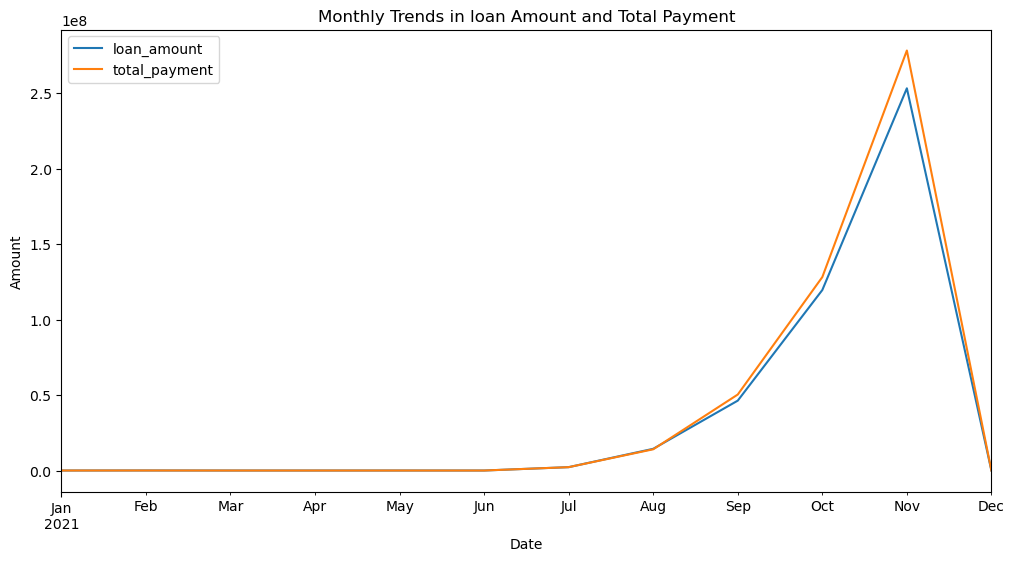

In [133]:
# Line Chart for Monthly Trends
df.set_index('issue_date', inplace = True)
monthly_trends = df.resample('M').agg({'loan_amount':'sum','total_payment':'sum','int_rate':'mean','dti':'mean'})

monthly_trends[['loan_amount','total_payment']].plot(kind='line', figsize=(12, 6))
plt.title('Monthly Trends in loan Amount and Total Payment')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()

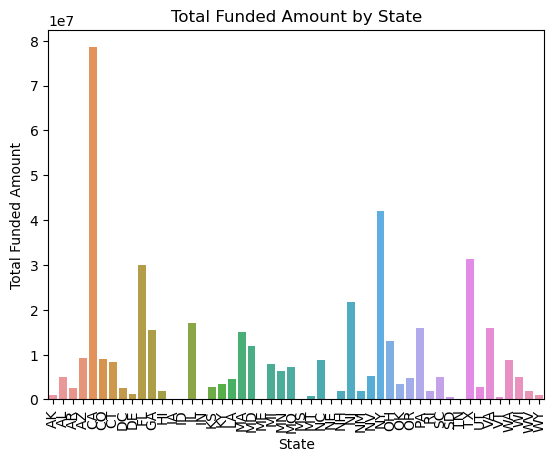

In [134]:
# Bar chart for Regional Analysis
regional_data = df.groupby('address_state').agg({'loan_amount':'sum','total_payment':'sum','int_rate':'mean','dti':'mean'}).reset_index()

sns.barplot(x='address_state',y='loan_amount',data=regional_data)
plt.title('Total Funded Amount by State')
plt.xlabel('State')
plt.ylabel('Total Funded Amount')
plt.xticks(rotation=90)
plt.show()

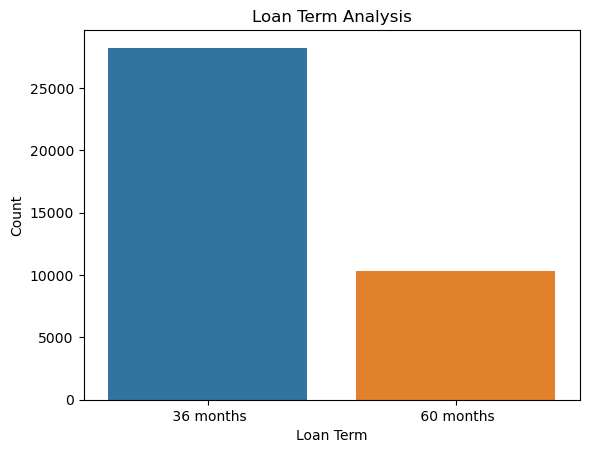

In [135]:
# Bar Chart for Loan Term Analysis
loan_term_data = df['term'].value_counts().reset_index()
loan_term_data.columns = ['term','count']

sns.barplot(x='term', y='count', data=loan_term_data)
plt.title('Loan Term Analysis')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.show()


# The bar graph explains that the loan term for 36 months it is 25000 above, when it comes to 60 months of loan term it is upto 10000.

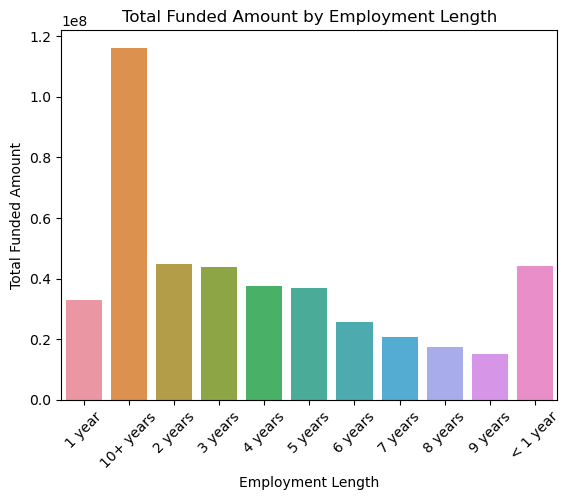

In [136]:
## Bar Chart for Employment Length Analysis
emp_length_data = df.groupby('emp_length').agg({
    'loan_amount': 'sum',
    'total_payment': 'sum',
    'int_rate': 'mean',
    'dti': 'mean'
}).reset_index()

sns.barplot(x='emp_length', y='loan_amount', data=emp_length_data)
plt.title('Total Funded Amount by Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Total Funded Amount')
plt.xticks(rotation=45)
plt.show()


# Here the graph represents that the total amount funded for the all employees and their length
# For one year the funded amount was 0.3% and for 10+ years the funded amount was 1.1 above
# 

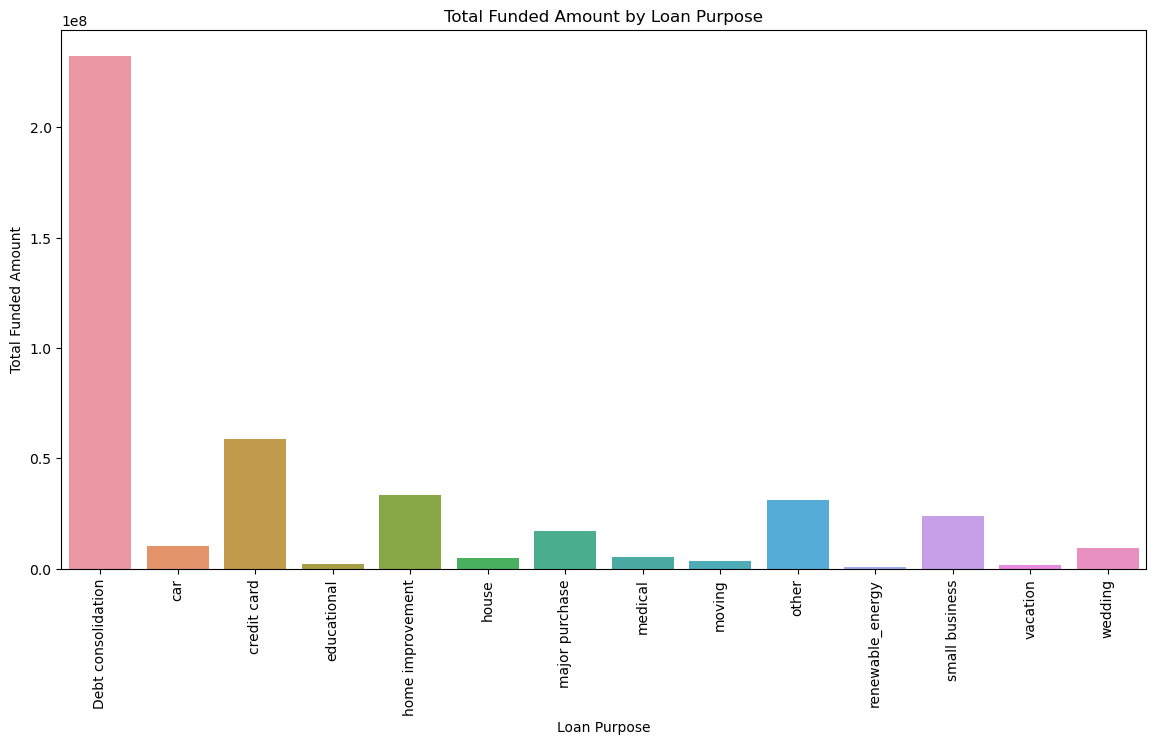

In [182]:
purpose_analysis = df.groupby('purpose')['loan_amount'].sum().reset_index()
plt.figure(figsize=(14,7))
sns.barplot(x='purpose',y='loan_amount', data=purpose_analysis)
plt.title('Total Funded Amount by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Total Funded Amount')
plt.xticks(rotation=90)
plt.show()

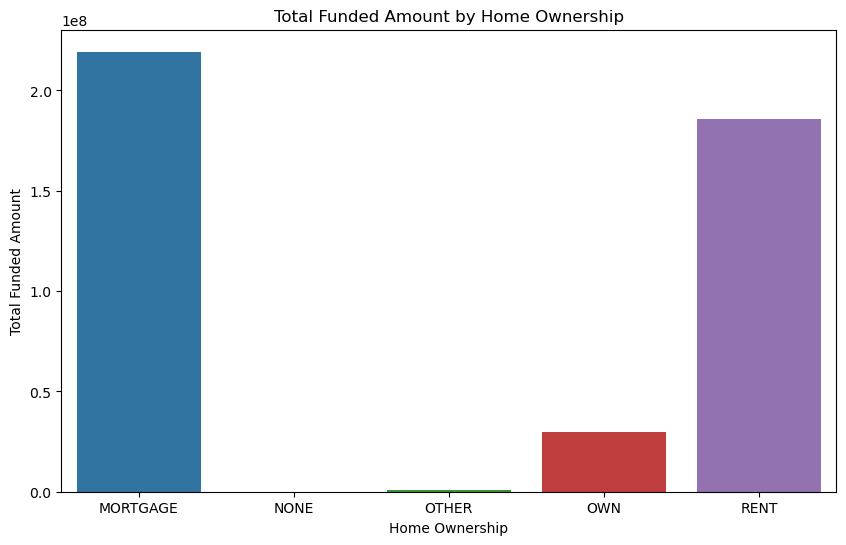

In [185]:
home_ownership_analysis = df.groupby('home_ownership')['loan_amount'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='home_ownership',y='loan_amount',data=home_ownership_analysis)
plt.title('Total Funded Amount by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Total Funded Amount')
plt.show()

In [186]:
df=pd.read_excel("//Applications//financial_loan.xlsx")
df.head(2)

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-11-02 00:00:00,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01 00:00:00,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939


In [159]:
total_loan_applications = len(df)
total_loan_applications

38576

In [161]:
# Define criteria for good and bad loans 
good_loan_criteria = ((df['loan_status'] == 'Current') &
                      (df['grade'].isin(['A', 'B', 'C'])) &
                      (df['dti'] < 0.4))
good_loan_criteria

0        False
1        False
2        False
3        False
4        False
         ...  
38571     True
38572     True
38573    False
38574    False
38575    False
Length: 38576, dtype: bool

In [165]:
bad_loan_criteria = ((df['loan_status'] == 'Current') &
                      (df['grade'].isin(['D', 'E', 'F'])) &
                      (df['dti'] >= 0.4))
bad_loan_criteria

0        False
1        False
2        False
3        False
4        False
         ...  
38571    False
38572    False
38573    False
38574    False
38575    False
Length: 38576, dtype: bool

In [178]:
# Define criteria for good and bad loans
good_loan_criteria = (
    (df['loan_status'] == 'Current') &
    (df['grade'].isin(['A', 'B', 'C'])) &  # Assuming A, B, C grades are good
    (df['dti'] < 0.4)  # Assuming DTI less than 40% is good
)

bad_loan_criteria = (
    (df['loan_status'].isin(['Default', 'Charged Off', 'Late'])) |
    (df['grade'].isin(['D', 'E', 'F', 'G'])) |  # Assuming D, E, F, G grades are bad
    (df['dti'] >= 0.4)  # Assuming DTI 40% or more is bad
)

# Classify loans
df['loan_classification'] = 'Neutral'  # Default classification
df.loc[good_loan_criteria, 'loan_classification'] = 'Good'
df.loc[bad_loan_criteria, 'loan_classification'] = 'Bad'

# Calculate metrics
total_loans = len(df)
good_loans = df[df['loan_classification'] == 'Good']
bad_loans = df[df['loan_classification'] == 'Bad']

# Metrics for Good Loans
good_loan_application_percentage = (len(good_loans) / total_loans) * 100
good_loan_applications = len(good_loans)
good_loan_funded_amount = good_loans['loan_amount'].sum()
good_loan_total_received_amount = good_loans['total_payment'].sum()

# Metrics for Bad Loans
bad_loan_application_percentage = (len(bad_loans) / total_loans) * 100
bad_loan_applications = len(bad_loans)
bad_loan_funded_amount = bad_loans['loan_amount'].sum()
bad_loan_total_received_amount = bad_loans['total_payment'].sum()

# Display the results
print("Good Loans:")
print(f"1. Good Loan Application Percentage: {good_loan_application_percentage:.2f}%")
print(f"2. Good Loan Applications: {good_loan_applications}")
print(f"3. Good Loan Funded Amount: ${good_loan_funded_amount:.2f}")
print(f"4. Good Loan Total Received Amount: ${good_loan_total_received_amount:.2f}")

print("\nBad Loans:")
print(f"5. Bad Loan Application Percentage: {bad_loan_application_percentage:.2f}%")
print(f"6. Bad Loan Applications: {bad_loan_applications}")
print(f"7. Bad Loan Funded Amount: ${bad_loan_funded_amount:.2f}")
print(f"8. Bad Loan Total Received Amount: ${bad_loan_total_received_amount:.2f}")


Good Loans:
1. Good Loan Application Percentage: 1.60%
2. Good Loan Applications: 619
3. Good Loan Funded Amount: $10368900.00
4. Good Loan Total Received Amount: $12549085.00

Bad Loans:
5. Bad Loan Application Percentage: 32.32%
6. Bad Loan Applications: 12470
7. Bad Loan Funded Amount: $166838400.00
8. Bad Loan Total Received Amount: $166957706.00
